In [1]:
from openai import OpenAI
from dotenv import load_dotenv
import os

load_dotenv()


ai_api = os.getenv("NAGA_AI_KEY")
client = OpenAI(
    api_key= ai_api,
    base_url='https://api.naga.ac/v1'
    )

def generate(prompt, model="gpt-3.5-turbo", temperature=0, max_tokens=1000):
    response = client.chat.completions.create(
        model=model,
        temperature=temperature,
        max_tokens=max_tokens,
        messages=[
            {
                "role": "user",
                "content": prompt,
            },
        ],
    )
    return response.choices[0].message.content

In [ ]:
import pandas as pd

prompt = (
    "Siapkan dataset penjualan dalam format CSV sebanyak 50 data penjualan dengan nama file dataset_example.csv, dataset mencakup tanggal, jumlah penjualan, harga dan kategori produk"
)

sample_data = generate(prompt)

# Memisahkan data_records dari prompt yang dihasilkan
data_records = sample_data.split("\n")[4:]

# Memisahkan setiap kolom
data_records = [record.split(",") for record in data_records]

# Mengonversi data_records menjadi DataFrame
df = pd.DataFrame(data_records, columns=["Tanggal", "Jumlah Penjualan", "Harga", "Kategori Produk"])

# Menghapus spasi di sekitar data
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Mengganti _ dengan spasi pada kolom 'Kategori Produk'
df['Kategori Produk'] = df['Kategori Produk'].str.replace('_', ' ')

# Menyimpan DataFrame ke dalam file CSV
df.to_csv("dataset_example.csv", index=False)

In [16]:
from openai import OpenAI
from dotenv import load_dotenv
import os
import pandas as pd

load_dotenv()

ai_api = os.getenv("NAGA_AI_KEY")
client = OpenAI(
    api_key= ai_api,
    base_url='https://api.naga.ac/v1'
    )

# Fungsi untuk menghasilkan teks menggunakan OpenAI API
def generate(prompt, model="gpt-3.5-turbo", temperature=0, max_tokens=1000):
    response = client.chat.completions.create(
        model=model,
        temperature=temperature,
        max_tokens=max_tokens,
        messages=[
            {
                "role": "user",
                "content": prompt,
            },
        ],
    )
    return response.choices[0].message.content

# Fungsi untuk menghasilkan deskripsi ringkas dari dataset penjualan
def generate_sales_description(dataset):
    prompt = f"Analisis dataset penjualan:\n\n{dataset}"
    return generate(prompt)

# Fungsi untuk melakukan analisis dataset penjualan
def analyze_sales_data(df):
    # Menghitung total penjualan
    total_sales = df['Jumlah Penjualan'].sum()

    # Menghitung rata-rata harga
    average_price = df['Harga'].mean()

    # Menghitung jumlah produk unik
    unique_products = df['Kategori Produk'].nunique()

    return total_sales, average_price, unique_products

# Fungsi untuk menghasilkan deskripsi analisis dataset penjualan
def generate_analysis_description(total_sales, average_price, unique_products):
    description = f"Total penjualan dalam dataset adalah {total_sales} unit. Rata-rata harga produk adalah {average_price:.2f} dan terdapat {unique_products} produk unik dalam dataset."
    return description

# Fungsi untuk membaca dataset penjualan dari file CSV
def read_sales_data(filename):
    return pd.read_csv(filename)

# Fungsi untuk menyimpan deskripsi analisis ke dalam file teks
def save_analysis_description(description, filename):
    with open(filename, 'w') as file:
        file.write(description)

if __name__ == "__main__":
    # Membaca dataset penjualan
    df = read_sales_data("dataset_example.csv")

    # Menghasilkan deskripsi ringkas dari dataset penjualan
    sales_description = generate_sales_description(df.to_string())

    # Menyimpan deskripsi ringkas
    with open("sales_description.txt", "w") as f:
        f.write(sales_description)

    # Melakukan analisis dataset penjualan
    total_sales, average_price, unique_products = analyze_sales_data(df)

    # Menghasilkan deskripsi analisis dataset penjualan
    analysis_description = generate_analysis_description(total_sales, average_price, unique_products)

    # Menyimpan deskripsi analisis dataset penjualan
    save_analysis_description(analysis_description, "analysis_description.txt")

    print("Deskripsi Ringkas Dataset Penjualan:")
    print(sales_description)
    print("\nDeskripsi Analisis Dataset Penjualan:")
    print(analysis_description)

Deskripsi Ringkas Dataset Penjualan:
Dataset ini berisikan informasi penjualan yang terdapat beberapa kolom seperti Tanggal, Jumlah Penjualan, Harga, dan Kategori Produk. Data ini mencakup penjualan dari tanggal 1 Januari hingga 19 Februari 2022, dimana penjualan dilakukan pada kategori produk tertentu seperti elektronik, pakaian, dan alat rumah tangga. Dataset ini dapat digunakan untuk melakukan analisis terkait penjualan produk dalam periode waktu tertentu, tren penjualan, jenis produk yang paling diminati, dan lain sebagainya.

Deskripsi Analisis Dataset Penjualan:
Total penjualan dalam dataset adalah 1888 unit. Rata-rata harga produk adalah 377.60 dan terdapat 3 produk unik dalam dataset.


In [17]:
from openai import OpenAI
from dotenv import load_dotenv
import os

load_dotenv()

ai_api = os.getenv("NAGA_AI_KEY")
client = OpenAI(
    api_key= ai_api,
    base_url='https://api.naga.ac/v1'
)

# Fungsi untuk menghasilkan teks menggunakan OpenAI API
def generate(prompt, model="gpt-3.5-turbo", temperature=0, max_tokens=1000):
    response = client.chat.completions.create(
        model=model,
        temperature=temperature,
        max_tokens=max_tokens,
        messages=[
            {
                "role": "user",
                "content": prompt,
            },
        ],
    )
    return response.choices[0].message.content

# Prompt untuk analisis tren penjualan
def analyze_sales_trend_prompt():
    prompt = "Analisis tren penjualan dari dataset ini. Apa saja pola atau tren yang dapat Anda identifikasi?"
    return generate(prompt)

# Prompt untuk segmentasi pelanggan
def customer_segmentation_prompt():
    prompt = "Lakukan segmentasi pelanggan berdasarkan data penjualan. Berdasarkan apa Anda akan mengelompokkan pelanggan?"
    return generate(prompt)

# Prompt untuk prediksi penjualan
def sales_prediction_prompt():
    prompt = "Gunakan data penjualan ini untuk memprediksi penjualan di bulan/tahun mendatang."
    return generate(prompt)

if __name__ == "__main__":
    # Analisis tren penjualan
    sales_trend_analysis = analyze_sales_trend_prompt()
    print("Analisis Tren Penjualan:")
    print(sales_trend_analysis)
    print()

    # Segmentasi pelanggan
    customer_segmentation = customer_segmentation_prompt()
    print("Segmentasi Pelanggan:")
    print(customer_segmentation)
    print()

    # Prediksi penjualan
    sales_prediction = sales_prediction_prompt()
    print("Prediksi Penjualan:")
    print(sales_prediction)

Analisis Tren Penjualan:
Berdasarkan dataset penjualan yang diberikan, beberapa pola atau tren yang dapat diidentifikasi adalah:

1. Tren penjualan bulanan: Terdapat peningkatan penjualan setiap bulan dari bulan Januari hingga bulan Maret, kemudian terjadi penurunan pada bulan April dan Mei, sebelum kembali meningkat pada bulan Juni dan Juli. Setelah itu, terjadi penurunan pada bulan Agustus dan September, sebelum kembali meningkat pada bulan Oktober dan November.

2. Tren penjualan tahunan: Secara umum, terdapat peningkatan penjualan dari tahun ke tahun. Namun, terdapat fluktuasi penjualan setiap bulan yang dapat dipengaruhi oleh faktor-faktor seperti musim atau promosi penjualan.

3. Pola penjualan harian: Terdapat pola penjualan harian yang menunjukkan peningkatan penjualan pada hari-hari tertentu, seperti pada hari Jumat dan Sabtu. Hal ini mungkin disebabkan oleh kebiasaan konsumen yang lebih banyak berbelanja pada akhir pekan.

4. Pola penjualan produk: Beberapa produk mungkin mem

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Tanggal           50 non-null     object
 1   Jumlah Penjualan  50 non-null     int64 
 2   Harga             50 non-null     int64 
 3   Kategori Produk   50 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.7+ KB
None

Statistik Deskriptif:
       Jumlah Penjualan       Harga
count         50.000000   50.000000
mean          37.760000  377.600000
std           20.509391  205.093906
min            8.000000   80.000000
25%           20.250000  202.500000
50%           34.500000  345.000000
75%           54.750000  547.500000
max           75.000000  750.000000


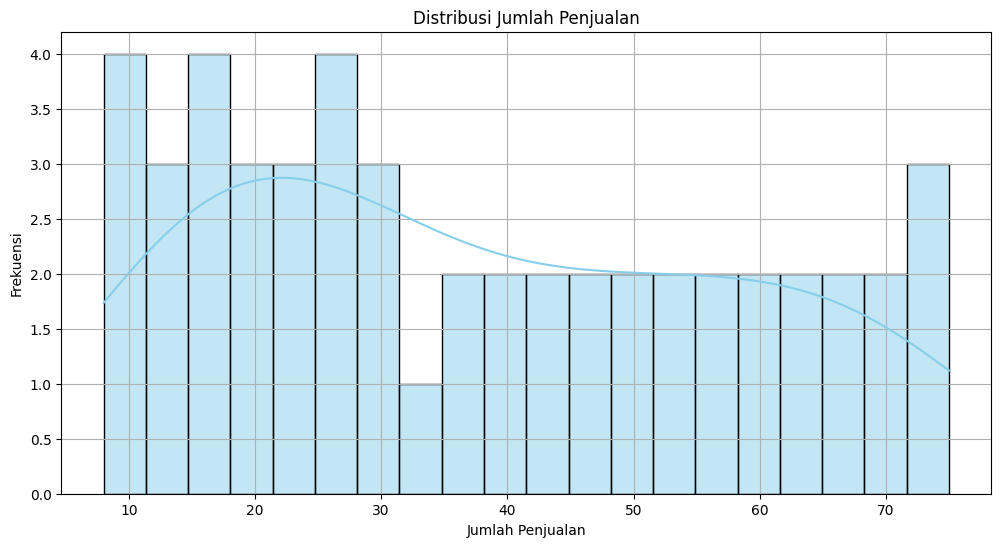

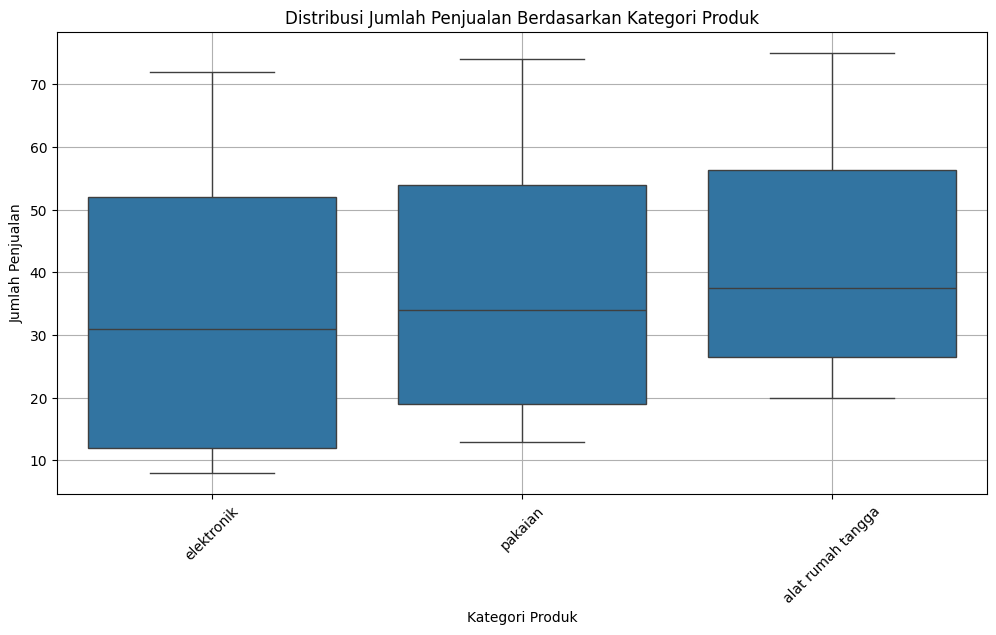


Insight dari OpenAI API:
Untuk menganalisis tren penjualan dari dataset, langkah pertama yang perlu dilakukan adalah melihat data penjualan dari waktu ke waktu, kemudian mengidentifikasi pola atau tren yang muncul dari data tersebut.

Beberapa pola atau tren yang dapat diidentifikasi dari dataset penjualan antara lain:

1. Tren Musiman: Jika terdapat peningkatan atau penurunan penjualan pada waktu yang sama setiap tahunnya, hal ini menunjukkan adanya tren musiman dalam penjualan. Misalnya, penjualan produk tertentu bisa meningkat saat musim liburan atau di awal tahun ajaran baru.

2. Tren Penurunan atau Peningkatan: Melalui analisis data penjualan dari waktu ke waktu, dapat diidentifikasi apakah terdapat tren penurunan atau peningkatan penjualan secara keseluruhan. Jika terdapat penurunan penjualan dari waktu ke waktu, dapat menganalisis penyebabnya dan mengambil tindakan perbaikan. Sebaliknya, jika terdapat peningkatan penjualan, dapat mencari pola atau alasan di balik tren tersebut 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from openai import OpenAI
from dotenv import load_dotenv
import os

# Load environment variables
load_dotenv()

# Initialize OpenAI client
ai_api = os.getenv("NAGA_AI_KEY")
client = OpenAI(
    api_key=ai_api,
    base_url='https://api.naga.ac/v1'
)

# Function to generate text using OpenAI API
def generate(prompt, model="gpt-3.5-turbo", temperature=0, max_tokens=1000):
    response = client.chat.completions.create(
        model=model,
        temperature=temperature,
        max_tokens=max_tokens,
        messages=[
            {
                "role": "user",
                "content": prompt,
            },
        ],
    )
    return response.choices[0].message.content

# Function to read sales dataset from CSV file
def read_sales_data(filename):
    return pd.read_csv(filename)

# Read sales dataset
df = read_sales_data("dataset_example.csv")

# Analisis data awal
print("Informasi Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

# Visualisasi data
plt.figure(figsize=(12, 6))
sns.histplot(df['Jumlah Penjualan'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Jumlah Penjualan')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Kategori Produk', y='Jumlah Penjualan', data=df)
plt.title('Distribusi Jumlah Penjualan Berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Insight dari OpenAI API
prompt = "Analisis tren penjualan dari dataset ini. Apa saja pola atau tren yang dapat Anda identifikasi?"
openai_insight = generate(prompt)
print("\nInsight dari OpenAI API:")
print(openai_insight)